In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind


pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('stud_math.xls', skipinitialspace=True)

In [4]:
display(df.head())
df.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
# Для удобства использования pandas переименуем некоторые колонки:
df.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu',
                   'Mjob': 'mjob', 'Fjob': 'fjob'}, inplace=True)

In [6]:
# 20  studytime, granular в описании задания эта колонка не значится, удалим ее
df.drop(['studytime, granular'], axis='columns', inplace=True)

In [7]:
#Отображение информации о колонке 
def show_info_column(dataframe,column):    
    display(dataframe[column].describe())
    plt.hist(dataframe[column], bins=30)
    plt.ylabel('Количество')
    plt.xlabel(column);
    #plt.title('Histogram');    
    plt.show()
    #Нижняя граница выбросов 
    minimum_emission_limit = round(dataframe[column].mean() - 3 * dataframe[column].std(),0)
    #Верхняя граница выбросов 
    maximum_emission_limit = round(dataframe[column].mean() + 3 * dataframe[column].std(),0)  
    #Количество выбросов 
    quantity_of_emissions = len(dataframe[round(((df[column] - dataframe[column].mean()) / dataframe[column].std()).abs(),0) > 3].index)
    print('Границы выбросов',minimum_emission_limit,maximum_emission_limit)    
    display(sns.boxplot(data=dataframe[column]))
    print('Количество выбросов',quantity_of_emissions)

In [8]:
def show_empty_column_value(dataframe):
    # Посчитаем колонки с пустыми строками
    count_empty_column_value = 0
    for column in dataframe.columns:                
        if(dataframe[column].dtype == 'object'):
            if len(df[df[column].str.strip() == ''].index) > 0:
                print('В колонке ', column, ' есть пустые строковые значения')
                count_empty_column_value += 1    
    
    if(count_empty_column_value == 0):
        print('В колонках пустых строк не найдено')
    else:
        print('Всего колонок с пустыми строками', count_empty_column_value)

In [9]:
def del_nan_value(dataframe):    
    for column in dataframe.columns:
        df.dropna(subset=[column], inplace=True)        

In [10]:
def get_stat_dif(dataframe,column,predicted):
    cols = dataframe.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(dataframe.loc[dataframe.loc[:, column] == comb[0], predicted], 
                        dataframe.loc[dataframe.loc[:, column] == comb[1], predicted]).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [11]:
#Заполнение значение Nan в колонке модой
def fill_nane_value_mode_value(dataframe,column):
    dataframe[column].fillna(dataframe[column].mode()[0], inplace=True)    

In [12]:
#Заполнение значение Nan в колонке модой
def fill_nane_value_mode_value(dataframe,column):
    dataframe[column].fillna(dataframe[column].mode()[0], inplace=True)    

In [13]:
def show_null_value_and_value_counts(dataframe,column):
    print('Nan значений',len(dataframe[dataframe[column].isnull()].index))
    print(dataframe[column].value_counts())
    print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (dataframe[column].value_counts()>10).sum())    

In [14]:
#Возвращает моду для переданной колонке по значению в колонке score
#Если при анализе значений в колонке мода не ярко выражена то возможно, что это имеет смысл
def get_mode_value_on_score(dataframe, score,column):    
    return df[(df['score'] == score) & (df[column].isnull()!=True)][column].mode()[0]  

In [15]:
# Заполняет Nan значения в переданной колонке группированной модой относительно колонки score
def fill_mode_value_on_score(column):
    df_nan_column = df[df[column].isnull()]
    for index, row in df_nan_column.iterrows():
        df.loc[index, column] = get_mode_value_on_score(
            df, row['score'], column)

In [16]:
# Заполняет выбросы в переданной колонке группированной модой относительно колонки score
def fill_emission_mode_value_on_score(column,value):
    df_nan_column = df[df[column]>=value]
    for index, row in df_nan_column.iterrows():
        df.loc[index, column] = get_mode_value_on_score(
            df, row['score'], column)

In [17]:
def get_boxplot(datatframe,column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=datatframe.loc[datatframe.loc[:, column].isin(datatframe.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [18]:
def change_type_coilumn(dataframe,list_column_int):
    for column in dataframe.columns:
        if(column in list_column_int):
            dataframe[column] = dataframe[column].astype('int')
        else:
            dataframe[column] = dataframe[column].astype('str')

In [19]:
# Заменяем ошибочное значение в колонке неким другим возможно более правильным значением
def change_erroneous_value(dataframe,column,value1,value2):
    i = dataframe[column] == value1
    dataframe.loc[i, column] = value2

In [20]:
# Проверим есть ли колонки с пустыми строковыми значениями если есть будем заменячть на Nan 
show_empty_column_value(df)

В колонках пустых строк не найдено


In [88]:
#Удалим сразу строки с пустыми значениями в колонке score
df.dropna(subset=['score'], inplace=True)

In [22]:
show_null_value_and_value_counts(df,'school')

Nan значений 0
GP    344
MS     45
Name: school, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [23]:
show_null_value_and_value_counts(df,'sex')

Nan значений 0
F    204
M    185
Name: sex, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [24]:
show_null_value_and_value_counts(df,'age')

Nan значений 0
16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

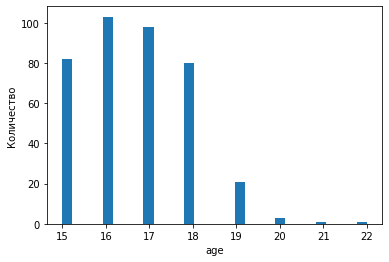

Границы выбросов 13.0 20.0


Количество выбросов 1


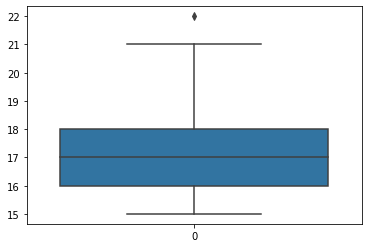

In [25]:
show_info_column(df,'age')

In [26]:
show_null_value_and_value_counts(df,'address')

Nan значений 15
U    291
R     83
Name: address, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [27]:
fill_nane_value_mode_value(df,'address')

In [28]:
show_null_value_and_value_counts(df,'famsize')

Nan значений 27
GT3    255
LE3    107
Name: famsize, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [29]:
fill_nane_value_mode_value(df,'famsize')

In [30]:
show_null_value_and_value_counts(df,'pstatus')

Nan значений 45
T    308
A     36
Name: pstatus, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [31]:
fill_nane_value_mode_value(df,'pstatus')

In [32]:
show_null_value_and_value_counts(df,'medu')

Nan значений 3
4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: medu, dtype: int64
Значений, встретившихся в столбце более 10 раз: 4


In [33]:
fill_nane_value_mode_value(df,'medu')

In [34]:
show_null_value_and_value_counts(df,'fedu')

Nan значений 24
2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: fedu, dtype: int64
Значений, встретившихся в столбце более 10 раз: 4


In [35]:
#Возможно значение 40 это опечатка заменим его на 4
change_erroneous_value(df,'fedu',40,4)
#i = df['fedu'] == 40
#df.loc[i, 'fedu'] = 4

In [36]:
fill_nane_value_mode_value(df,'fedu')

In [37]:
show_null_value_and_value_counts(df,'mjob')

Nan значений 19
other       127
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


In [38]:
fill_nane_value_mode_value(df,'mjob')

In [39]:
show_null_value_and_value_counts(df,'fjob')

Nan значений 36
other       194
services     99
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


In [40]:
fill_nane_value_mode_value(df,'fjob')

In [41]:
show_null_value_and_value_counts(df,'reason') 

Nan значений 17
course        135
reputation    102
home          101
other          34
Name: reason, dtype: int64
Значений, встретившихся в столбце более 10 раз: 4


In [42]:
fill_nane_value_mode_value(df,'reason')

In [43]:
show_null_value_and_value_counts(df,'guardian')

Nan значений 31
mother    248
father     86
other      24
Name: guardian, dtype: int64
Значений, встретившихся в столбце более 10 раз: 3


In [44]:
fill_nane_value_mode_value(df,'guardian')

In [45]:
show_null_value_and_value_counts(df,'traveltime')

Nan значений 28
1.0    239
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64
Значений, встретившихся в столбце более 10 раз: 3


In [46]:
fill_nane_value_mode_value(df,'traveltime')

In [47]:
show_null_value_and_value_counts(df,'studytime') 

Nan значений 7
2.0    189
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64
Значений, встретившихся в столбце более 10 раз: 4


In [48]:
fill_nane_value_mode_value(df,'studytime')

In [49]:
show_null_value_and_value_counts(df,'failures')  

Nan значений 22
0.0    290
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64
Значений, встретившихся в столбце более 10 раз: 4


In [50]:
fill_nane_value_mode_value(df,'failures')

In [51]:
show_null_value_and_value_counts(df,'schoolsup')

Nan значений 9
no     331
yes     49
Name: schoolsup, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [52]:
fill_nane_value_mode_value(df,'schoolsup')

In [53]:
show_null_value_and_value_counts(df,'famsup')

Nan значений 38
yes    216
no     135
Name: famsup, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [54]:
fill_nane_value_mode_value(df,'famsup')

In [55]:
show_null_value_and_value_counts(df,'paid')  

Nan значений 39
no     197
yes    153
Name: paid, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [56]:
fill_nane_value_mode_value(df,'paid')

In [57]:
show_null_value_and_value_counts(df,'activities')

Nan значений 14
yes    192
no     183
Name: activities, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [58]:
fill_nane_value_mode_value(df,'activities')

In [59]:
show_null_value_and_value_counts(df,'nursery')

Nan значений 15
yes    297
no      77
Name: nursery, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [60]:
fill_nane_value_mode_value(df,'nursery')

In [61]:
show_null_value_and_value_counts(df,'higher')

Nan значений 20
yes    350
no      19
Name: higher, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [62]:
fill_nane_value_mode_value(df,'higher')

In [63]:
show_null_value_and_value_counts(df,'internet') 

Nan значений 34
yes    300
no      55
Name: internet, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [64]:
fill_nane_value_mode_value(df,'internet')

In [65]:
show_null_value_and_value_counts(df,'romantic') 

Nan значений 31
no     235
yes    123
Name: romantic, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [66]:
fill_nane_value_mode_value(df,'romantic')

In [67]:
show_null_value_and_value_counts(df,'famrel') 

Nan значений 27
 4.0    178
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64
Значений, встретившихся в столбце более 10 раз: 4


In [68]:
#Возможно значение -1 это ошибка заменим его на моду
change_erroneous_value(df,'famrel',-1,4)
#i = df['famrel'] == -1
#df.loc[i, 'famrel'] = 4

In [69]:
fill_nane_value_mode_value(df,'famrel')

In [70]:
show_null_value_and_value_counts(df,'freetime')  

Nan значений 9
3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
Name: freetime, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


In [71]:
fill_nane_value_mode_value(df,'freetime')

In [72]:
show_null_value_and_value_counts(df,'goout') 

Nan значений 7
3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
Name: goout, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


In [73]:
fill_nane_value_mode_value(df,'goout')

In [74]:
show_null_value_and_value_counts(df,'health') 

Nan значений 15
5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
Name: health, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


In [75]:
fill_nane_value_mode_value(df,'health')

In [76]:
show_null_value_and_value_counts(df,'absences')  

Nan значений 11
0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64
Значений, встретившихся в столбце более 10 раз: 8


In [77]:
#Возможно это опечатка значение не 385, а 3 и значение score 85
change_erroneous_value(df,'absences',385,3)
#i = df['absences'] == 385
#df.loc[i, 'absences'] = 3 # Возможно , что это была опечатка absences 3 score 85

In [78]:
fill_mode_value_on_score('absences')

count    389.000000
mean       6.141388
std       13.202743
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      212.000000
Name: absences, dtype: float64

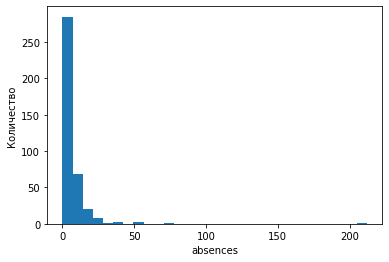

Границы выбросов -33.0 46.0


Количество выбросов 4


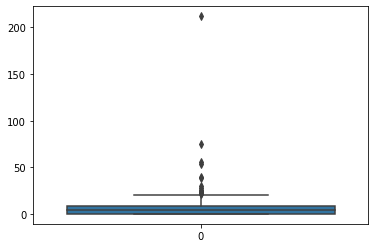

In [79]:
show_info_column(df,'absences')

In [80]:
#df['absences'].median()
fill_emission_mode_value_on_score('absences',46)

Преобразуем типы колонок количественные к int номинативные к str

In [81]:
list_column_int = ['age','absences','score']
change_type_coilumn(df,list_column_int)

In [82]:
for col in df.columns:    
    if(df[col].dtype == 'object'):
        #print(col)
        get_stat_dif(df,col,'score')

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [83]:
df_for_model =  df.loc[:, ['address', 'medu', 'mjob', 'failures', 'higher','romantic']]

In [84]:
df_for_model.head()
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   389 non-null    object
 1   medu      389 non-null    object
 2   mjob      389 non-null    object
 3   failures  389 non-null    object
 4   higher    389 non-null    object
 5   romantic  389 non-null    object
dtypes: object(6)
memory usage: 31.3+ KB


In [87]:
df_not_null = pd.read_csv('stud_math.xls', skipinitialspace=True)

In [85]:
for col in df.columns:    
    if(df[col].dtype == 'object'):
        #print(col)
        get_stat_dif(df,col,'score')

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [86]:
for column in df.columns:                
    if(df[column].dtype == 'object'):                
        get_stat_dif(df,column,'score')

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
